In [1]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [2]:
import pandas as pd
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
print(df.shape)
print(df.dtypes)
df = df.dropna(axis=0, how='any')

(8950, 18)
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
#В качестве признаков кластеризации берем:
#1. balance - баланс на карте
#2. purchases - общая сумма покупок
#3. purchase_trx - количество покупок

#при помощи этого, мы распределяем пользователей на группы

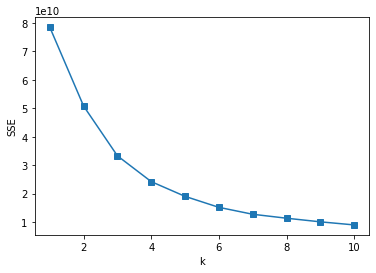

In [6]:
X = df.loc[:,['BALANCE','PURCHASES', 'PURCHASES_TRX']]

SSE = [] 

for k in range(1,11):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,11), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [7]:
# берем 7 кластеров (после него идут незначительные изменения)

In [8]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
Y_pred = kmeans.labels_

df['CLASTER'] = Y_pred

X = df.loc[:,['BALANCE','PURCHASES', 'PURCHASES_TRX', 'CLASTER']]
X.head(60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,BALANCE,PURCHASES,PURCHASES_TRX,CLASTER
0,40.900749,95.40,2,0
1,3202.467416,0.00,0,5
2,2495.148862,773.17,12,5
4,817.714335,16.00,1,0
5,1809.828751,1333.28,8,5
6,627.260806,7091.01,64,1
7,1823.652743,436.20,12,5
8,1014.926473,861.49,5,0
9,152.225975,1281.60,3,0
10,1293.124939,920.12,12,5


In [43]:
X = df.loc[:,['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
Y_pred = kmeans.labels_
df['claster_1'] = Y_pred
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLASTER,claster_1
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5,1
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1,1
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,5,1
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0,0
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,5,1


In [44]:
X = df.loc[:,['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'claster_1']]

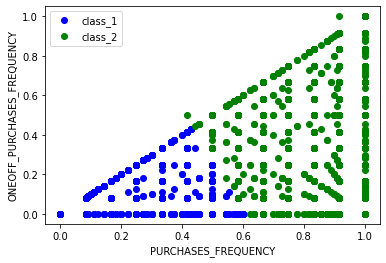

In [45]:
plt.plot(X[X['claster_1']==0]['PURCHASES_FREQUENCY'], X[X['claster_1']==0]['ONEOFF_PURCHASES_FREQUENCY'], 'bo', label='class_1')

plt.plot(X[X['claster_1']==1]['PURCHASES_FREQUENCY'], X[X['claster_1']==1]['ONEOFF_PURCHASES_FREQUENCY'], 'go', label='class_2')

plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.legend(loc=0)
plt.show()